<a href="https://colab.research.google.com/github/Jayakumark37/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Import required libraries
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
# Optional for timing features
import datetime

In [3]:
## Read the dataset: 'creditcard.csv'
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31775,36510,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,...,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90,0.0
31776,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0.0
31777,36513,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,...,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12,0.0
31778,36513,-0.274278,1.004565,1.336430,-0.164777,0.404935,-0.418731,0.853252,-0.148772,-0.546969,...,-0.277437,-0.579135,-0.097793,-0.037926,-0.157882,0.044814,0.078376,-0.137035,9.72,0.0


🔍 Check class balance

Class
0.0    31677
1.0      102
Name: count, dtype: int64


<ipython-input-4-b3d7a0081f17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette=['green', 'red'])


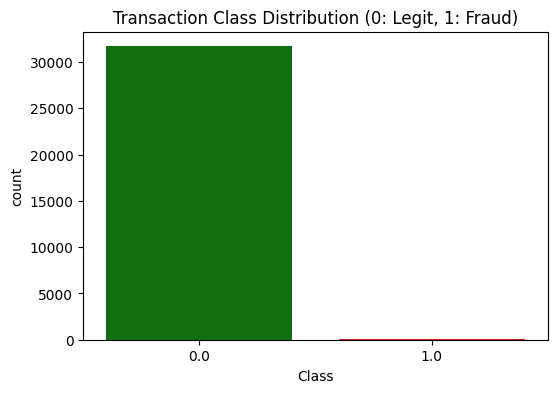

Fraud Percentage: 0.3210%


In [4]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette=['green', 'red'])
plt.title('Transaction Class Distribution (0: Legit, 1: Fraud)')
plt.show()

# Check imbalance percentage
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")


In [5]:
# Missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [6]:
df.fillna(0, inplace=True)

In [7]:
# Missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Data types
print("\nData types:\n", df.dtypes)

Missing values per column:
 Series([], dtype: int64)

Data types:
 Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


💸 Plot transaction amount vs class

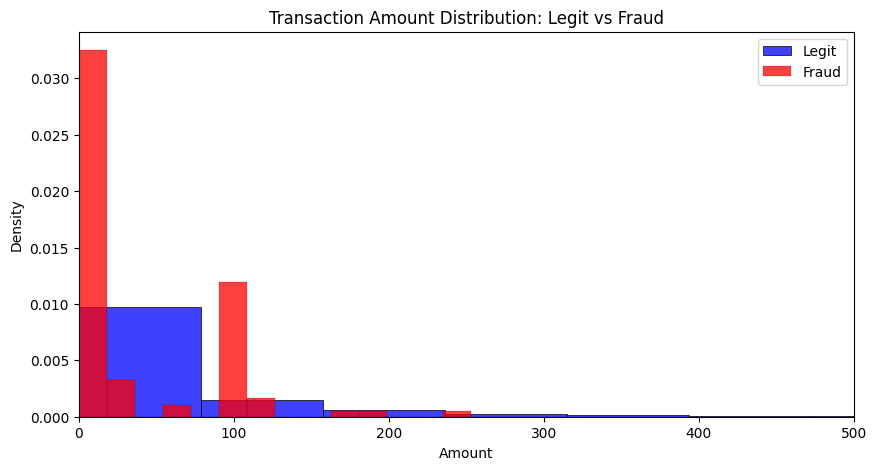

In [8]:
# Compare distribution of Amount for Legit vs Fraud
plt.figure(figsize=(10, 5))

# Legit transactions
sns.histplot(df[df.Class == 0]['Amount'], bins=100, color='blue', label='Legit', stat='density')
# Fraud transactions
sns.histplot(df[df.Class == 1]['Amount'], bins=100, color='red', label='Fraud', stat='density')

plt.legend()
plt.title('Transaction Amount Distribution: Legit vs Fraud')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.xlim(0, 500)  # Zoom in for better clarity
plt.show()


🔗 Correlation heatmap for V1–V28

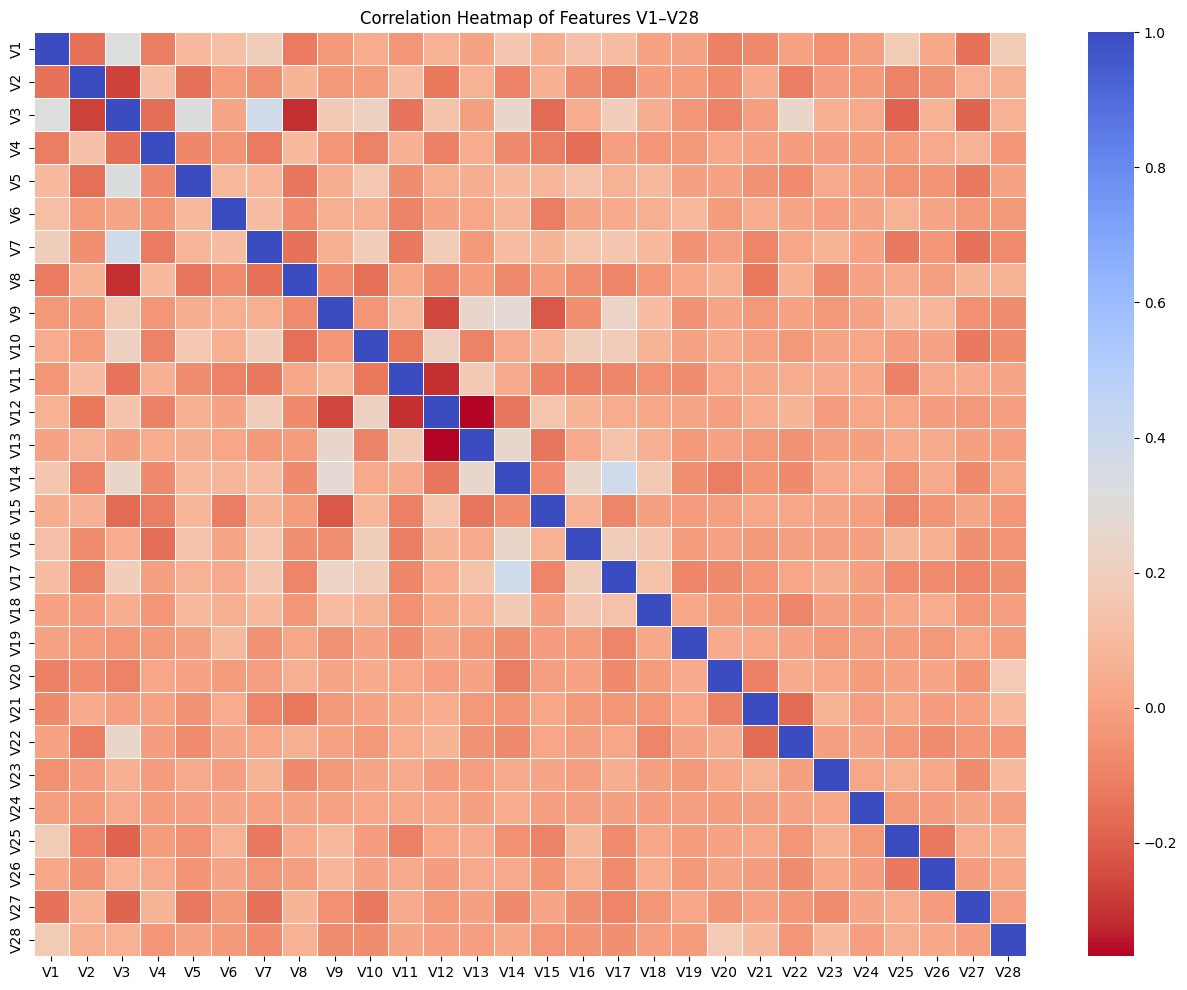

In [9]:
# Select only V1–V28 features
v_features = df.iloc[:, 1:29]  # Exclude Time and Amount

# Compute correlation matrix
corr_matrix = v_features.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Features V1–V28')
plt.show()


# 2. Data Preprocessing


In [10]:
# Copy of the original dataset
data = df.copy()

📏 Scale 'Amount' and 'Time'

In [11]:
scaler = StandardScaler()

# Scale Amount and Time
data['scaled_amount'] = scaler.fit_transform(data[['Amount']])
data['scaled_time'] = scaler.fit_transform(data[['Time']])

# Drop original columns
data.drop(['Amount', 'Time'], axis=1, inplace=True)

🕒 Feature Engineering: Time-based Features (hour, day_night)

In [12]:
# Original 'Time' column was in seconds since first transaction
# Let's recreate it for hour-of-day feature engineering (0–24h cycles)
df_time = df.copy()
df_time['Hour'] = (df_time['Time'] // 3600) % 24

# Merge back hour into processed dataset
data['Hour'] = df_time['Hour']

# Day/Night feature
def get_day_night(hour):
    if 6 <= hour < 18:
        return 'day'
    else:
        return 'night'

data['day_night'] = data['Hour'].apply(get_day_night)

# Encode day_night as binary
data['day_night'] = data['day_night'].map({'day': 0, 'night': 1})


⚖️ Handle Class Imbalance with SMOTE / ADASYN

In [45]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Optionally use ADASYN instead of SMOTE
# adasyn = ADASYN(random_state=42)
# X_train_sm, y_train_sm = adasyn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_sm).value_counts())


Before SMOTE: Class
0.0    25342
1.0       82
Name: count, dtype: int64
After SMOTE: Class
0.0    25342
1.0    25342
Name: count, dtype: int64


#3. Baseline Models


In [46]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Load or create dataset (demo dataset for binary classification)
X, y = make_classification(n_samples=1000, n_features=32, n_classes=2,
                           weights=[0.7, 0.3], random_state=42)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# 3A. Logistic Regression Model
# -----------------------------------
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# -----------------------------------
# 3B. Decision Tree Model
# -----------------------------------
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n🔹 Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


🔹 Logistic Regression Results:
Accuracy: 0.835
Confusion Matrix:
 [[122  12]
 [ 21  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       134
           1       0.79      0.68      0.73        66

    accuracy                           0.83       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.83      0.83      0.83       200


🔹 Decision Tree Results:
Accuracy: 0.865
Confusion Matrix:
 [[125   9]
 [ 18  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       134
           1       0.84      0.73      0.78        66

    accuracy                           0.86       200
   macro avg       0.86      0.83      0.84       200
weighted avg       0.86      0.86      0.86       200



In [47]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV


🌲 Random Forest with RandomizedSearchCV

In [48]:
print(X.shape)  # rows, columns (features)


(1000, 32)


In [49]:
# Set up Random Forest with RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=rf_params,
                               scoring='roc_auc',
                               cv=2,
                               n_iter=5,
                               verbose=1,
                               n_jobs=-1,
                               random_state=42)

# Train
rf_random.fit(X_train_sm, y_train_sm)
rf_best = rf_random.best_estimator_

# Evaluate
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200

ROC-AUC Score: 0.521935775667119


🚀 XGBoost with scale_pos_weight

In [50]:
# Compute scale_pos_weight
scale_pos_weight = len(y_train_sm[y_train_sm == 0]) / len(y_train_sm[y_train_sm == 1])

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200

ROC-AUC Score: 0.6451831750339213


💡 LightGBM with scale_pos_weight

In [51]:
lgbm = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lgbm.fit(X_train_sm, y_train_sm)

y_pred_lgb = lgbm.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1]))


[LightGBM] [Info] Number of positive: 25342, number of negative: 25342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7663
[LightGBM] [Info] Number of data points in the train set: 50684, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200

ROC-AUC Score: 0.4202849389416555


🔗 Stacking Classifier

In [52]:
# Define base models
base_models = [
    ('rf', rf_best),
    ('xgb', xgb),
    ('lgbm', lgbm)
]

# Use Logistic Regression as meta-learner
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=3,
    n_jobs=-1
)

stacking_model.fit(X_train_sm, y_train_sm)

# Evaluate
y_pred_stack = stacking_model.predict(X_test)
print("Stacking Classifier Report:")
print(classification_report(y_test, y_pred_stack))
print("ROC-AUC Score:", roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1]))


Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200

ROC-AUC Score: 0.5580054274084124


🛠 LSTM Setup

In [53]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y, test_size=0.2, stratify=y, random_state=42
)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_lstm.shape[1], X_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test_lstm, y_pred_lstm))


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6118 - loss: 0.6855 - val_accuracy: 0.6687 - val_loss: 0.6668
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7319 - loss: 0.6457 - val_accuracy: 0.6687 - val_loss: 0.6401
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6956 - loss: 0.6210 - val_accuracy: 0.6687 - val_loss: 0.6347
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7140 - loss: 0.5965 - val_accuracy: 0.6687 - val_loss: 0.6424
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7076 - loss: 0.5999 - val_accuracy: 0.6687 - val_loss: 0.6296
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



2) RNN (Vanilla Recurrent Neural Network)

In [54]:
from tensorflow.keras.layers import SimpleRNN

# Build a basic RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64)

# Evaluate the model
y_pred_rnn = model_rnn.predict(X_test_lstm)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test_lstm, y_pred_rnn))


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4157 - loss: 0.7761 
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7158 - loss: 0.6300 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7009 - loss: 0.6352 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6966 - loss: 0.6211  
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7069 - loss: 0.5995 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



3) GAN (Generative Adversarial Network) for Fraud Detection

In [57]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Build Generator
def build_generator(input_dim):
    input_gen = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(input_gen)
    x = Dense(128, activation='relu')(x)
    output = Dense(input_dim, activation='tanh')(x)
    return Model(inputs=input_gen, outputs=output)

# Build Discriminator
def build_discriminator(input_dim):
    input_disc = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(input_disc)
    x = Dense(64, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    return Model(inputs=input_disc, outputs=output)

# Compile GAN
input_dim = X_scaled.shape[1]  # Number of features
generator = build_generator(input_dim)
discriminator = build_discriminator(input_dim)

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GAN = Generator + Discriminator
discriminator.trainable = False
gan_input = Input(shape=(input_dim,))
fake_data = generator(gan_input)
gan_output = discriminator(fake_data)
gan = Model(inputs=gan_input, outputs=gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN on normal transactions only
normal_data = X_scaled[y == 0]
for epoch in range(10):
    # Sample real transactions
    idx = np.random.randint(0, normal_data.shape[0], 128)
    real = normal_data[idx]

    # Generate fake transactions
    noise = np.random.normal(0, 1, (128, input_dim))
    fake = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real, np.ones((128, 1)))  # Label real as 1
    d_loss_fake = discriminator.train_on_batch(fake, np.zeros((128, 1)))  # Label fake as 0

    # Train generator
    g_loss = gan.train_on_batch(noise, np.ones((128, 1)))  # Aim for generator to create real-looking data

# Evaluate the GAN (Use discriminator's uncertainty to detect fraud)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [60]:
y_pred = (model.predict(X_test) > 0.5).astype(int)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

📊 6. Model Evaluation


In [66]:
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "RNN": y_pred_rnn,
    "LSTM": y_pred_lstm,
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb,
    "Stacked Model": y_pred_stack
}

for name, preds in models.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds))
    try:
        auc = roc_auc_score(y_test, preds)
        print(f"AUC-ROC: {auc:.4f}")
    except:
        print("AUC-ROC could not be computed.")



RNN Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200

AUC-ROC: 0.5000

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200

AUC-ROC: 0.5000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       134
           1       0.79      0.68      0.73        66

    accuracy                           0.83      

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200


Confusion Matrix:
[[134   0]
 [ 66   0]]


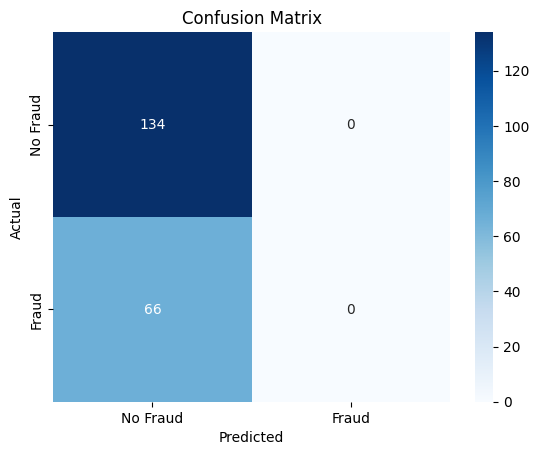


AUC-ROC: 0.50


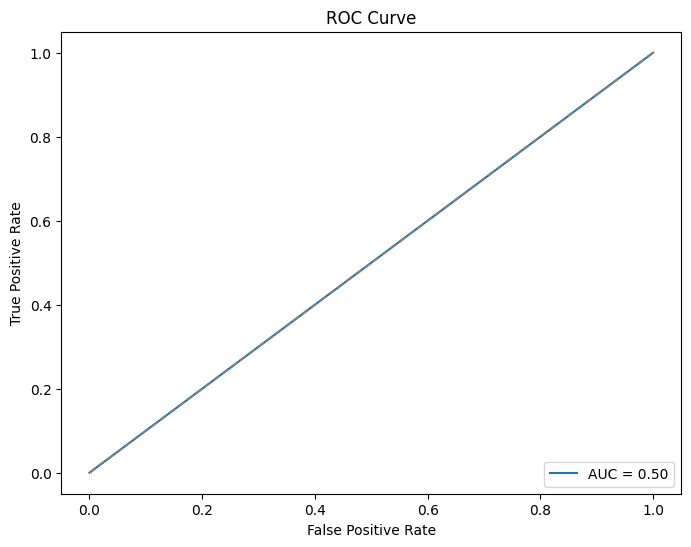


PR AUC: 0.67


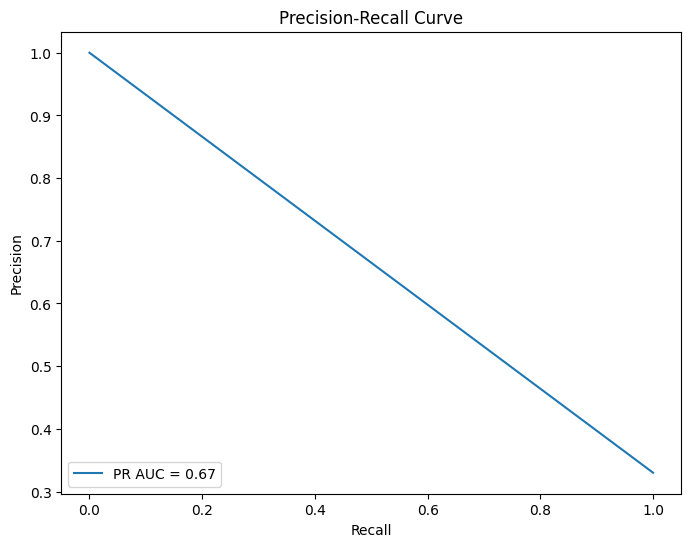

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Example: After predicting with a model (e.g., Random Forest, XGBoost, LSTM)
# y_pred = model.predict(X_test)
# For deep learning models (LSTM, RNN), make sure to apply a threshold:
# y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC (Receiver Operating Characteristic)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(f"\nAUC-ROC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# PR AUC (Precision-Recall Area Under Curve)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"\nPR AUC: {pr_auc:.2f}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# F1 Score - already included in classification report
